In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import sys
print(sys.executable)

e:\AI engineer\Guvi\Capstone Projects\Project3\fresh_clone\SmartPremium\venv\Scripts\python.exe


In [26]:
train_data=pd.read_csv("E:/AI engineer/Guvi/Capstone Projects/Project3/fresh_clone/SmartPremium/data/train.csv")

In [27]:
train_data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [29]:
train_data.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [30]:
train_data.shape

(1200000, 21)

In [31]:
data=train_data.copy()

In [32]:
# Drop columns with more than 50% missing values
threshold = len(data) * 0.5
data = data.dropna(thresh=threshold, axis=1)
data.shape

(1200000, 21)

In [33]:
data.drop('Policy Start Date',axis=1,inplace=True)
data.drop('id',axis=1,inplace=True)

In [49]:
data.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,Employed,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,595.0,3.0,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,Employed,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,Poor,Yes,Weekly,House,2022.0


In [34]:
data.isnull().sum().reset_index()[data.isnull().sum().reset_index()[0] > 0] ["index"].to_list()

['Age',
 'Annual Income',
 'Marital Status',
 'Number of Dependents',
 'Occupation',
 'Health Score',
 'Previous Claims',
 'Vehicle Age',
 'Credit Score',
 'Insurance Duration',
 'Customer Feedback']

#### Imputations

Age

In [35]:
print(np.mean(data['Age']),data['Age'].median())

41.145563131986506 41.0


In [36]:
data['Age'].fillna(data['Age'].median(), inplace= True)

Annual Income

In [37]:
data[['Annual Income','Premium Amount']].corr()

,Annual Income,Premium Amount
Annual Income,1.00000,-0.01239
Premium Amount,-0.01239,1.00000


In [38]:
data[data['Annual Income'].isnull()].head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
22,22.0,Male,NaN,Divorced,4.0,PhD,NaN,25.583790,Urban,Comprehensive,NaN,5.0,773.0,5.0,Good,Yes,Monthly,House,202.0
36,41.0,Female,NaN,Married,3.0,PhD,Self-Employed,14.001630,Urban,Comprehensive,0.0,15.0,589.0,6.0,Average,No,Rarely,House,250.0
67,45.0,Male,NaN,Married,3.0,High School,Self-Employed,17.988631,Suburban,Comprehensive,NaN,18.0,375.0,9.0,Average,Yes,Rarely,House,829.0
86,37.0,Male,NaN,Single,1.0,Bachelor's,NaN,13.038269,Suburban,Comprehensive,NaN,6.0,562.0,2.0,Average,No,Weekly,House,61.0
87,52.0,Male,NaN,Married,2.0,PhD,Unemployed,28.864410,Rural,Comprehensive,0.0,18.0,488.0,1.0,Average,No,Weekly,Apartment,369.0


In [39]:
print(np.mean(data['Annual Income']),np.median(data['Annual Income']),data['Annual Income'].median())

32745.21777653108 nan 23911.0


In [40]:
data['Annual Income'].fillna(data['Annual Income'].median(), inplace= True)

'Marital Status'

In [41]:
print(data['Marital Status'].value_counts())
print("===========")
print(data['Marital Status'].isnull().sum())

Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64
18529


In [42]:
data['Marital Status'].mode()[0]

'Single'

In [43]:
data['Marital Status'].fillna(data['Marital Status'].mode()[0], inplace= True)

Number of Dependents

In [44]:
print(data['Number of Dependents'].value_counts())
print("======Mode=====")
print(data['Number of Dependents'].mode()[0])
print("======No of mising values=====")
print(data['Number of Dependents'].isnull().sum())

Number of Dependents
3.0    221475
4.0    220340
0.0    218124
2.0    215313
1.0    215076
Name: count, dtype: int64
======Mode=====
3.0
======No of mising values=====
109672


In [45]:
data['Number of Dependents'].fillna(data['Number of Dependents'].mode()[0], inplace= True)

Modularising Imputations

In [ ]:

def imputations():
    
    print("=====Columns with Null values======")
    columns_with_nulls=data.isnull().sum().reset_index()[data.isnull().sum().reset_index()[0] > 0] ["index"].to_list()
    print("Columns with null values\n",columns_with_nulls)

    numerical_features,categorical_features=[],[]
    for i in data.columns.to_list():
          if data[i].dtype == 'object':
            categorical_features.append(i)
          else:
            numerical_features.append(i)
    
    for i in ['Previous Claims','Number of Dependents','Insurance Duration','Vehicle Age']:
      numerical_features.remove(i)
      categorical_features.append(i)

    print("===========")
    print("Numerical columns List:- ",numerical_features,len(numerical_features),sep="\n")
    print("===========")
    print("Categorical columns List:- ",categorical_features,len(categorical_features),sep="\n")

    #impute non-series data

    # Impute numerical features with median
    for feature in numerical_features:
        data[feature].fillna(data[feature].median(), inplace=True)

    # Impute categorical features with mode
    for feature in categorical_features:
        data[feature].fillna(data[feature].mode()[0], inplace=True)
    
    print("=====Columns with Null values======")
    columns_with_nulls=data.isnull().sum().reset_index()[data.isnull().sum().reset_index()[0] > 0] ["index"].to_list()
    print("Columns with null values\n",columns_with_nulls)


imputations()

=====Columns with Null values======
Columns with null values
 ['Occupation', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Customer Feedback']
Numerical columns List:- 
['Age', 'Annual Income', 'Health Score', 'Credit Score', 'Premium Amount']
5
Categorical columns List:- 
['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type', 'Previous Claims', 'Number of Dependents', 'Insurance Duration', 'Vehicle Age']
14
=====Columns with Null values======
Columns with null values
 []


In [52]:
data.to_csv('E:/AI engineer/Guvi/Capstone Projects/Project3/fresh_clone/SmartPremium/data/train_cleaned.csv',index=False)

In [126]:
data=pd.read_csv('E:/AI engineer/Guvi/Capstone Projects/Project3/fresh_clone/SmartPremium/data/train_cleaned.csv')

## Control Outliers

In [127]:
from scipy import stats

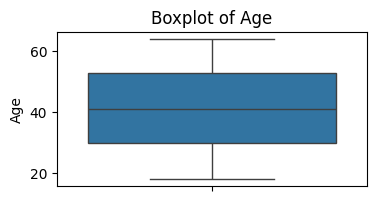

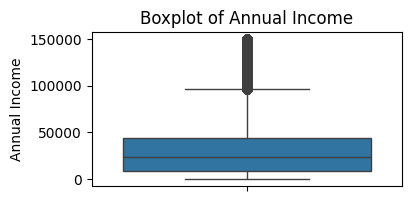

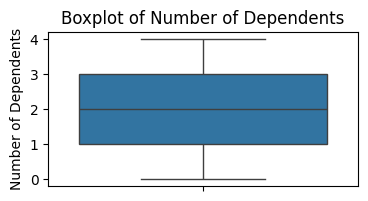

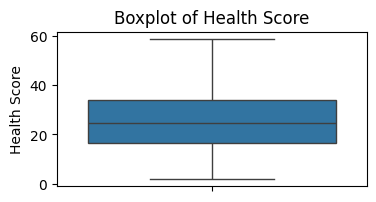

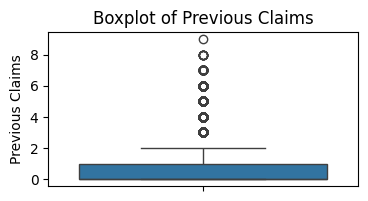

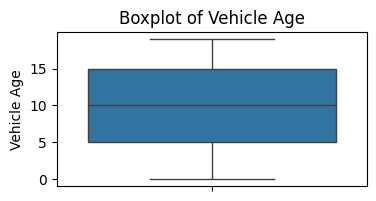

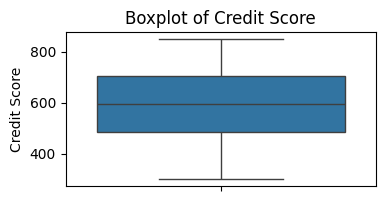

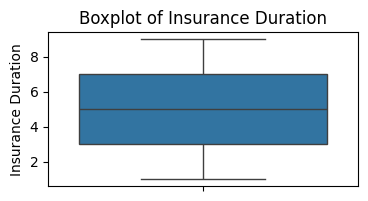

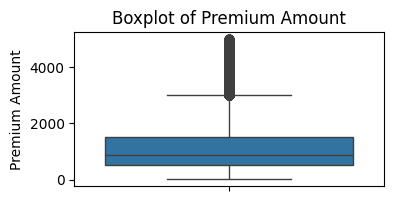

In [128]:
numerical_features,categorical_features=[],[]
for i in data.columns.to_list():
      if data[i].dtype == 'object':
        categorical_features.append(i)
      else:
        numerical_features.append(i)

for feature in numerical_features:
    plt.figure(figsize=(4,2))
    sns.boxplot(y=data[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

In [129]:
outlier_features = ['Annual Income', 'Premium Amount', 'Previous Claims']

In [130]:
# Capping outliers at the 99th percentile
#Replace outliers with a specified percentile value.
for feature in outlier_features:
    cap_value = data[feature].quantile(0.99)
    data[feature] = data[feature].clip(upper=cap_value)

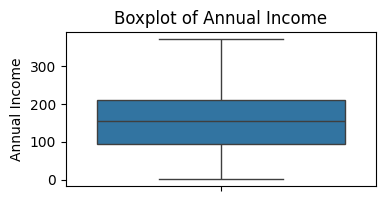

In [131]:
plt.figure(figsize=(4,2))
sns.boxplot(np.sqrt(data['Annual Income']))
plt.title(f"Boxplot of {'Annual Income'}")
plt.show()

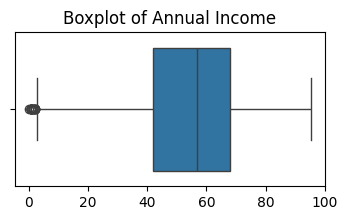

In [132]:
value,a=stats.boxcox(data['Annual Income'])
plt.figure(figsize=(4,2))
sns.boxplot(x = value)
plt.title(f"Boxplot of {'Annual Income'}")
plt.show()

In [133]:
data['Annual Income']=np.sqrt(data['Annual Income'])

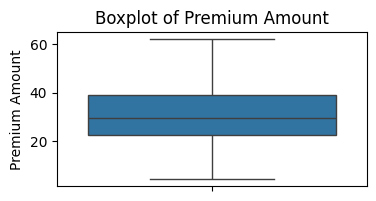

In [134]:
plt.figure(figsize=(4,2))
sns.boxplot(np.sqrt(data['Premium Amount']))
plt.title(f"Boxplot of {'Premium Amount'}")
plt.show()

In [135]:
data['Premium Amount']=np.sqrt(data['Premium Amount'])

## Encoding

In [136]:
categorical_features

['Gender',
 'Marital Status',
 'Education Level',
 'Occupation',
 'Location',
 'Policy Type',
 'Customer Feedback',
 'Smoking Status',
 'Exercise Frequency',
 'Property Type']

In [137]:
data[categorical_features].head()

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,Female,Married,Bachelor's,Self-Employed,Urban,Premium,Poor,No,Weekly,House
1,Female,Divorced,Master's,Employed,Rural,Comprehensive,Average,Yes,Monthly,House
2,Male,Divorced,High School,Self-Employed,Suburban,Premium,Good,Yes,Weekly,House
3,Male,Married,Bachelor's,Employed,Rural,Basic,Poor,Yes,Daily,Apartment
4,Male,Single,Bachelor's,Self-Employed,Rural,Premium,Poor,Yes,Weekly,House


In [138]:
label_encoding_features=['Education Level', 'Exercise Frequency', 'Customer Feedback']
onehot_encoding_features=['Gender', 'Marital Status', 'Occupation', 'Location', 'Policy Type', 'Smoking Status', 'Property Type']

label encoding

In [139]:
from sklearn.preprocessing import LabelEncoder

In [141]:
le  = LabelEncoder()

In [142]:
for col in label_encoding_features:
    data[col] = le.fit_transform(data[col])
    
data[label_encoding_features].head()

,Education Level,Exercise Frequency,Customer Feedback
0,0,3,2
1,2,1,0
2,1,3,1
3,0,0,2
4,0,3,2


onehot encoding

In [150]:
data[onehot_encoding_features].head()

,Gender,Marital Status,Occupation,Location,Policy Type,Smoking Status,Property Type
0,Female,Married,Self-Employed,Urban,Premium,No,House
1,Female,Divorced,Employed,Rural,Comprehensive,Yes,House
2,Male,Divorced,Self-Employed,Suburban,Premium,Yes,House
3,Male,Married,Employed,Rural,Basic,Yes,Apartment
4,Male,Single,Self-Employed,Rural,Premium,Yes,House


In [148]:
from sklearn.preprocessing import OneHotEncoder

In [151]:
oe = OneHotEncoder(sparse_output=False, handle_unknown='ignore') #sparse_output=False returns numpy array. handle_unknown='ignore' handles unseen categories during transform

In [ ]:
# Fit and transform the categorical columns
encoded_data = oe.fit_transform(data[onehot_encoding_features])

# Get the feature names after one-hot encoding
feature_names = oe.get_feature_names_out(input_features=data[onehot_encoding_features].columns)

# Create a new DataFrame with the encoded data and feature names
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

# Display the encoded DataFrame
print(encoded_df)

In [153]:
# Drop the original categorical columns from the data DataFrame
data = data.drop(onehot_encoding_features, axis=1)

# Concatenate the encoded DataFrame with the original data DataFrame
data = pd.concat([data, encoded_df], axis=1)

# Display the updated DataFrame
data.head()

,Age,Annual Income,Number of Dependents,Education Level,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,...,Location_Suburban,Location_Urban,Policy Type_Basic,Policy Type_Comprehensive,Policy Type_Premium,Smoking Status_No,Smoking Status_Yes,Property Type_Apartment,Property Type_Condo,Property Type_House
0,19.0,100.244701,1.0,0,22.598761,2.0,17.0,372.0,5.0,2,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,39.0,177.983145,3.0,2,15.569731,1.0,12.0,694.0,2.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,23.0,160.006250,3.0,1,47.177549,1.0,14.0,595.0,3.0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,21.0,372.213675,2.0,0,10.938144,1.0,0.0,367.0,1.0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,21.0,199.125589,1.0,0,20.376094,0.0,8.0,598.0,4.0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [155]:
import os
os.remove('E:/AI engineer/Guvi/Capstone Projects/Project3/fresh_clone/SmartPremium/data/train_cleaned.csv')
data.to_csv('E:/AI engineer/Guvi/Capstone Projects/Project3/fresh_clone/SmartPremium/data/train_cleaned.csv', index=False)

In [156]:
data=pd.read_csv('E:/AI engineer/Guvi/Capstone Projects/Project3/fresh_clone/SmartPremium/data/train_cleaned.csv')

In [158]:
data.columns

Index(['Age', 'Annual Income', 'Number of Dependents', 'Education Level',
       'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score',
       'Insurance Duration', 'Customer Feedback', 'Exercise Frequency',
       'Premium Amount', 'Gender_Female', 'Gender_Male',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Occupation_Employed',
       'Occupation_Self-Employed', 'Occupation_Unemployed', 'Location_Rural',
       'Location_Suburban', 'Location_Urban', 'Policy Type_Basic',
       'Policy Type_Comprehensive', 'Policy Type_Premium', 'Smoking Status_No',
       'Smoking Status_Yes', 'Property Type_Apartment', 'Property Type_Condo',
       'Property Type_House'],
      dtype='object')

In [161]:
data[numerical_features].head()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
0,19.0,100.244701,1.0,22.598761,2.0,17.0,372.0,5.0,53.563047
1,39.0,177.983145,3.0,15.569731,1.0,12.0,694.0,2.0,38.509739
2,23.0,160.006250,3.0,47.177549,1.0,14.0,595.0,3.0,23.811762
3,21.0,372.213675,2.0,10.938144,1.0,0.0,367.0,1.0,27.658633
4,21.0,199.125589,1.0,20.376094,0.0,8.0,598.0,4.0,44.966654


In [162]:
data['Vehicle Age'].value_counts()

Vehicle Age
17.0    62583
0.0     61615
11.0    61483
18.0    61399
10.0    61351
15.0    60817
14.0    60815
12.0    60718
19.0    60495
16.0    60314
9.0     59833
2.0     59741
7.0     59700
5.0     59499
3.0     59058
13.0    58684
8.0     58298
4.0     58148
6.0     58084
1.0     57365
Name: count, dtype: int64